In [97]:
# =====================================================
# ‚úÖ Colab ÌïúÍ∏Ä Ìè∞Ìä∏ ÏôÑÏ†Ñ Í≥†Ï†ï ÌÖúÌîåÎ¶ø (ÏûêÎèô ÌÉêÏßÄ¬∑ÏûêÎèô ÏÑ†ÌÉù)
# Îü∞ÌÉÄÏûÑ ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûëÌõÑ ÏΩîÎìú ÏûÖÎ†•
# =====================================================
!apt-get update -qq > /dev/null
!apt-get install -y fonts-noto-cjk fonts-nanum > /dev/null
!fc-cache -fv > /dev/null

import os, glob, shutil
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) matplotlib Ìè∞Ìä∏ Ï∫êÏãú Ìè¥Îçî Î≥¥Ïû• + Í∏∞Ï°¥ Ï∫êÏãú ÌååÏùº Ï†ïÎ¶¨
cache_dir = os.path.join(os.path.expanduser("~"), ".cache", "matplotlib")
os.makedirs(cache_dir, exist_ok=True)
for f in glob.glob(os.path.join(cache_dir, "fontlist-*.json*")):
    try:
        os.remove(f)
    except FileNotFoundError:
        pass

# 2) ÏãúÏä§ÌÖú Ìè∞Ìä∏ Î™©Î°ù ÏÉàÎ°ú ÏùΩÍ∏∞
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')  # ÏûàÏúºÎ©¥ Îì±Î°ù
# (Noto CJKÎäî Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ïãú ÏûêÎèô Îì±Î°ùÎê®)

# 3) ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏûêÎèô ÌÉêÏßÄ
candidates = [
    "NanumGothic",
    "Noto Sans CJK KR",   # Í∂åÏû•
    "Noto Sans CJK",      # ÏùºÎ∂Ä Î∞∞Ìè¨ÌåêÏóêÏÑú Ïù¥ Ïù¥Î¶ÑÏúºÎ°úÎßå Ïû°Ìûê Ïàò ÏûàÏùå
    "Noto Sans CJK SC",   # ÌòπÏãú Ï§ëÍµ≠Ïñ¥ Ìå®ÌÇ§ÏßÄÎßå ÍπîÎ†∏ÏùÑ Îïå ÎåÄÏ≤¥
]
available = {f.name for f in fm.fontManager.ttflist}
chosen = None
for name in candidates:
    if any(name == a or name in a for a in available):
        chosen = name
        break
if chosen is None:
    chosen = "DejaVu Sans"  # ÏµúÌõÑÏùò ÏïàÏ†ÑÏû•Ïπò(ÌïúÍ∏Ä ÎØ∏ÏßÄÏõê)

# 4) Ï†ÑÏó≠ Ìè∞Ìä∏ ÏÑ§Ï†ï (FontProperties Í∞ùÏ≤¥ ÏÇ¨Ïö© Ïïà Ìï® ‚Üí TypeError ÏòàÎ∞©)
plt.rcParams.update({
    "font.family": chosen,
    "font.sans-serif": [chosen],
    "axes.unicode_minus": False,
    "font.size": 10,
})

print("‚úÖ ÏÇ¨Ïö© Ìè∞Ìä∏:", chosen)
# Í∞ÑÎã® ÌÖåÏä§Ìä∏
plt.figure()
plt.title("ÌïúÍ∏Ä Ìè∞Ìä∏ ÌÖåÏä§Ìä∏: Í≥†¬∑Ï§ë¬∑Ï†Ä Ïó∞Î¥â Í∑∏Î£π (KR Ìè¨Ìï®) ‚úî")
plt.plot([0,1],[0,1])
plt.xlabel("Í∞ÄÎ°úÏ∂ï")
plt.ylabel("ÏÑ∏Î°úÏ∂ï")
plt.tight_layout()
plt.show()

In [1]:
# 0) ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
#
import numpy as np

# sklearn(ÏÇ¨Ïù¥ÌÅ¨ Îü∞) - Îü¨Ïã†Îü¨ÎãùÌïòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

from sklearn.model_selection import train_test_split
# Î∂ÑÌï† - Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ï§ë 8:2 or 7:3 ÏúºÎ°ú Î∂ÑÌï† ÌõÑ ÌÅ∞ Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Í≥ÑÌïôÏäµ ÌõÑ ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú Ïä§Ïä§Î°ú Í≤ÄÏÇ¨(Ï†ïÌôïÎèÑ ÌåêÎ≥Ñ)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú

df = pd.read_csv("/content/ai_job_market.csv")

df.head()

job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0       Full-time          Tracybury, AR     92860-109598  2025-08-20   
1       Full-time         Lake Scott, CU     78523-144875  2024-03-22   
2       Full-time         East Paige, CM    124496-217204  2025-09-18   
3       Full-time          Perezview, FI     50908-123743  2024-05-08   
4        Contract  North Desireeland, NE     98694-135413  2025-02-24   

  company_size                  tools_preferred  
0        Large                  KDB+, LangChain  
1        Large        FastAPI, KDB+, TensorFlow  
2        Large  BigQuery, PyTorch, Scikit-learn  
3        Large     TensorFlow, BigQuery, MLflow  
4        Large               PyTorch, LangChain

In [100]:
# 2) Î∂ÑÏÑùÏóê Ïì∏ Ïó¥(Ïª¨Îüº)Îßå ÏÑ†ÌÉù
#      - ÌÉÄÍπÉ : salary_range_usd Ï§ë Ïïû Ïà´ÏûêÎßå ÏÇ¨Ïö©Ìï¥ Ï¥àÎ¥âÏúºÎ°ú Í∞ÄÏ†ï
#      - ÏûÖÎ†• : industry, job_title, skills_required, experience_level, employment_type, location(Íµ≠Í∞ÄÎßå ÏÇ¨Ïö©), posted_date, company_size => ÌîºÏ≥ê(feature)
use_cols = ["salary_range_usd", "industry", "job_title", "skills_required",
             "experience_level", "employment_type", "location", "posted_date", "company_size"]
df = df[use_cols].copy()

In [101]:
df.head()

salary_range_usd    industry                 job_title  \
0     92860-109598  Healthcare              Data Analyst   
1     78523-144875        Tech  Computer Vision Engineer   
2    124496-217204        Tech          Quant Researcher   
3     50908-123743        Tech        AI Product Manager   
4     98694-135413     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location posted_date company_size  
0       Full-time          Tracybury, AR  2025-08-20        Large  
1       Full-time         Lake Scott, CU  2024-03-22        Large  
2       Full-time         East Paige, CM  2025-09-18        Large  
3       Full-time          Perezview, FI  2024-05-08        Large  
4        Contract  North Desireeland, NE  2025-02-24        Large

In [102]:
# Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖ

In [103]:
# 3) Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (ÌòÑÏû¨Îäî ÏóÜÏúºÎØÄÎ°ú Ìå®Ïä§)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_range_usd  2000 non-null   object
 1   industry          2000 non-null   object
 2   job_title         2000 non-null   object
 3   skills_required   2000 non-null   object
 4   experience_level  2000 non-null   object
 5   employment_type   2000 non-null   object
 6   location          2000 non-null   object
 7   posted_date       2000 non-null   object
 8   company_size      2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [105]:
# experience_level : Ïõê-Ìï´ Ïù∏ÏΩîÎî©(Í∞ÄÏû• Ïâ¨Ïö¥ Î∞©Î≤ï)
# drop_first=TrueÎ°ú ÎçîÎØ∏ Î≥ÄÏàò Ìï®Ï†ï ÌîºÌïòÍ∏∞(Ïó¥ ÌïòÎÇò Ï§ÑÏù¥Í∏∞)
experience_level_dum = pd.get_dummies(df["experience_level"], prefix="experience_level", drop_first=True)
df = pd.concat([df.drop(columns=["experience_level"]), experience_level_dum], axis=1)

In [106]:
df

salary_range_usd    industry                 job_title  \
0        92860-109598  Healthcare              Data Analyst   
1        78523-144875        Tech  Computer Vision Engineer   
2       124496-217204        Tech          Quant Researcher   
3        50908-123743        Tech        AI Product Manager   
4        98694-135413     Finance            Data Scientist   
...               ...         ...                       ...   
1995     90382-110126     Finance              NLP Engineer   
1996     47848-137195  Automotive        AI Product Manager   
1997    134994-180108   Education              Data Analyst   
1998      62388-82539   Education          Quant Researcher   
1999      55835-97374     Finance          Quant Researcher   

                                        skills_required employment_type  \
0     NumPy, Reinforcement Learning, PyTorch, Scikit...       Full-time   
1                       Scikit-learn, CUDA, SQL, Pandas       Full-time   
2             MLflow, FastAPI, Azure, PyTorch, SQL, GCP       Full-time   
3          Scikit-learn, C++, Pandas, LangChain, AWS, R       Full-time   
4                       Excel, Keras, SQL, Hugging Face        Contract   
...                                                 ...             ...   
1995                           Flask, FastAPI, Power BI      Internship   
1996           R, Flask, Excel, C++, CUDA, Scikit-learn          Remote   
1997       Hugging Face, Excel, Scikit-learn, R, MLflow        Contract   
1998                          AWS, Python, Scikit-learn        Contract   
1999                        Flask, TensorFlow, Power BI       Full-time   

                    location posted_date company_size  experience_level_Mid  \
0              Tracybury, AR  2025-08-20        Large                  True   
1             Lake Scott, CU  2024-03-22        Large                 False   
2             East Paige, CM  2025-09-18        Large                 False   
3              Perezview, FI  2024-05-08        Large                  True   
4      North Desireeland, NE  2025-02-24        Large                 False   
...                      ...         ...          ...                   ...   
1995     Washingtonmouth, SD  2024-04-22        Large                 False   
1996          Joshuafort, ZA  2023-12-02        Large                  True   
1997  West Brittanyburgh, CG  2023-10-29        Large                 False   
1998        Anthonyshire, OM  2024-08-10        Large                 False   
1999        Benjaminview, NE  2025-02-20      Startup                 False   

      experience_level_Senior  
0                       False  
1                        True  
2                       False  
3                       False  
4                        True  
...                       ...  
1995                     True  
1996                    False  
1997                    False  
1998                     True  
1999                     True  

[2000 rows x 10 columns]

In [107]:
# employment_type : Ïõê-Ìï´ Ïù∏ÏΩîÎî©(Í∞ÄÏû• Ïâ¨Ïö¥ Î∞©Î≤ï)
# drop_first=TrueÎ°ú ÎçîÎØ∏ Î≥ÄÏàò Ìï®Ï†ï ÌîºÌïòÍ∏∞(Ïó¥ ÌïòÎÇò Ï§ÑÏù¥Í∏∞)
employment_type_dum = pd.get_dummies(df["employment_type"], prefix="employment_type", drop_first=True)
df = pd.concat([df.drop(columns=["employment_type"]), employment_type_dum], axis=1)

# company_size : Ïõê-Ìï´ Ïù∏ÏΩîÎî©(Í∞ÄÏû• Ïâ¨Ïö¥ Î∞©Î≤ï)
# drop_first=TrueÎ°ú ÎçîÎØ∏ Î≥ÄÏàò Ìï®Ï†ï ÌîºÌïòÍ∏∞(Ïó¥ ÌïòÎÇò Ï§ÑÏù¥Í∏∞)
company_size_dum = pd.get_dummies(df["company_size"], prefix="company_size", drop_first=True)
df = pd.concat([df.drop(columns=["company_size"]), company_size_dum], axis=1)

# drop_first=TrueÎ°ú ÎçîÎØ∏ Î≥ÄÏàò Ìï®Ï†ï ÌîºÌïòÍ∏∞(Ïó¥ ÌïòÎÇò Ï§ÑÏù¥Í∏∞)
industry_dum = pd.get_dummies(df["industry"], prefix="industry", drop_first=True)
df = pd.concat([df.drop(columns=["industry"]), industry_dum], axis=1)

# drop_first=TrueÎ°ú ÎçîÎØ∏ Î≥ÄÏàò Ìï®Ï†ï ÌîºÌïòÍ∏∞(Ïó¥ ÌïòÎÇò Ï§ÑÏù¥Í∏∞)
job_title_dum = pd.get_dummies(df["job_title"], prefix="job_title", drop_first=True)
df = pd.concat([df.drop(columns=["job_title"]), job_title_dum], axis=1)

In [108]:
df

salary_range_usd                                    skills_required  \
0        92860-109598  NumPy, Reinforcement Learning, PyTorch, Scikit...   
1        78523-144875                    Scikit-learn, CUDA, SQL, Pandas   
2       124496-217204          MLflow, FastAPI, Azure, PyTorch, SQL, GCP   
3        50908-123743       Scikit-learn, C++, Pandas, LangChain, AWS, R   
4        98694-135413                    Excel, Keras, SQL, Hugging Face   
...               ...                                                ...   
1995     90382-110126                           Flask, FastAPI, Power BI   
1996     47848-137195           R, Flask, Excel, C++, CUDA, Scikit-learn   
1997    134994-180108       Hugging Face, Excel, Scikit-learn, R, MLflow   
1998      62388-82539                          AWS, Python, Scikit-learn   
1999      55835-97374                        Flask, TensorFlow, Power BI   

                    location posted_date  experience_level_Mid  \
0              Tracybury, AR  2025-08-20                  True   
1             Lake Scott, CU  2024-03-22                 False   
2             East Paige, CM  2025-09-18                 False   
3              Perezview, FI  2024-05-08                  True   
4      North Desireeland, NE  2025-02-24                 False   
...                      ...         ...                   ...   
1995     Washingtonmouth, SD  2024-04-22                 False   
1996          Joshuafort, ZA  2023-12-02                  True   
1997  West Brittanyburgh, CG  2023-10-29                 False   
1998        Anthonyshire, OM  2024-08-10                 False   
1999        Benjaminview, NE  2025-02-20                 False   

      experience_level_Senior  employment_type_Full-time  \
0                       False                       True   
1                        True                       True   
2                       False                       True   
3                       False                       True   
4                        True                      False   
...                       ...                        ...   
1995                     True                      False   
1996                    False                      False   
1997                    False                      False   
1998                     True                      False   
1999                     True                       True   

      employment_type_Internship  employment_type_Remote  company_size_Mid  \
0                          False                   False             False   
1                          False                   False             False   
2                          False                   False             False   
3                          False                   False             False   
4                          False                   False             False   
...                          ...                     ...               ...   
1995                        True                   False             False   
1996                       False                    True             False   
1997                       False                   False             False   
1998                       False                   False             False   
1999                       False                   False             False   

      ...  industry_Healthcare  industry_Retail  industry_Tech  \
0     ...                 True            False          False   
1     ...                False            False           True   
2     ...                False            False           True   
3     ...                False            False           True   
4     ...                False            False          False   
...   ...                  ...              ...            ...   
1995  ...                False            False          False   
1996  ...                False            False          False   
1997  ...                False            False

In [109]:
# True/False ‚Üí 1/0 Î≥ÄÌôò
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

salary_range_usd                                    skills_required  \
0        92860-109598  NumPy, Reinforcement Learning, PyTorch, Scikit...   
1        78523-144875                    Scikit-learn, CUDA, SQL, Pandas   
2       124496-217204          MLflow, FastAPI, Azure, PyTorch, SQL, GCP   
3        50908-123743       Scikit-learn, C++, Pandas, LangChain, AWS, R   
4        98694-135413                    Excel, Keras, SQL, Hugging Face   
...               ...                                                ...   
1995     90382-110126                           Flask, FastAPI, Power BI   
1996     47848-137195           R, Flask, Excel, C++, CUDA, Scikit-learn   
1997    134994-180108       Hugging Face, Excel, Scikit-learn, R, MLflow   
1998      62388-82539                          AWS, Python, Scikit-learn   
1999      55835-97374                        Flask, TensorFlow, Power BI   

                    location posted_date  experience_level_Mid  \
0              Tracybury, AR  2025-08-20                     1   
1             Lake Scott, CU  2024-03-22                     0   
2             East Paige, CM  2025-09-18                     0   
3              Perezview, FI  2024-05-08                     1   
4      North Desireeland, NE  2025-02-24                     0   
...                      ...         ...                   ...   
1995     Washingtonmouth, SD  2024-04-22                     0   
1996          Joshuafort, ZA  2023-12-02                     1   
1997  West Brittanyburgh, CG  2023-10-29                     0   
1998        Anthonyshire, OM  2024-08-10                     0   
1999        Benjaminview, NE  2025-02-20                     0   

      experience_level_Senior  employment_type_Full-time  \
0                           0                          1   
1                           1                          1   
2                           0                          1   
3                           0                          1   
4                           1                          0   
...                       ...                        ...   
1995                        1                          0   
1996                        0                          0   
1997                        0                          0   
1998                        1                          0   
1999                        1                          1   

      employment_type_Internship  employment_type_Remote  company_size_Mid  \
0                              0                       0                 0   
1                              0                       0                 0   
2                              0                       0                 0   
3                              0                       0                 0   
4                              0                       0                 0   
...                          ...                     ...               ...   
1995                           1                       0                 0   
1996                           0                       1                 0   
1997                           0                       0                 0   
1998                           0                       0                 0   
1999                           0                       0                 0   

      ...  industry_Healthcare  industry_Retail  industry_Tech  \
0     ...                    1                0              0   
1     ...                    0                0              1   
2     ...                    0                0              1   
3     ...                    0                0              1   
4     ...                    0                0              0   
...   ...                  ...              ...            ...   
1995  ...                    0                0              0   
1996  ...                    0                0              0   
1997  ...                    0                0

In [110]:
# ÏòàÏãú: skills_requiredÍ∞Ä Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú ÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞
# (Ïù¥ÎØ∏ dfÏóê Ïù¥ Ïª¨ÎüºÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
# Ïòà: "Python, SQL, Excel"

# 1Ô∏è‚É£ Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df['skills_list'] = df['skills_required'].fillna('').apply(
    lambda x: [s.strip() for s in x.split(',') if s.strip() != '']
)

# 2Ô∏è‚É£ Î™®Îì† Ïä§ÌÇ¨ ÏßëÌï© Ï∂îÏ∂ú
all_skills = sorted(set(sum(df['skills_list'], [])))  # Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨

print(f"Ï¥ù {len(all_skills)}Í∞ú Ïä§ÌÇ¨ Î∞úÍ≤¨")

# 3Ô∏è‚É£ Í∞Å Ïä§ÌÇ¨Î≥ÑÎ°ú 0/1 Ïù∏ÏΩîÎî©
for skill in all_skills:
    df[skill] = df['skills_list'].apply(lambda skills: int(skill in skills))

# 2Ô∏è‚É£ ÏõêÎ≥∏ Î¨∏ÏûêÏó¥ Ïª¨Îüº Ï†úÍ±∞
df = df.drop(columns=['skills_required', 'skills_list'])

# 4Ô∏è‚É£ Í≤∞Í≥º ÌôïÏù∏
print(df[all_skills].head())

Ï¥ù 22Í∞ú Ïä§ÌÇ¨ Î∞úÍ≤¨
   AWS  Azure  C++  CUDA  Excel  FastAPI  Flask  GCP  Hugging Face  Keras  \
0    0      0    0     0      0        1      0    1             0      0   
1    0      0    0     1      0        0      0    0             0      0   
2    0      1    0     0      0        1      0    1             0      0   
3    1      0    1     0      0        0      0    0             0      0   
4    0      0    0     0      1        0      0    0             1      1   

   ...  NumPy  Pandas  Power BI  PyTorch  Python  R  Reinforcement Learning  \
0  ...      1       0         0        1       0  0                       1   
1  ...      0       1         0        0       0  0                       0   
2  ...      0       0         0        1       0  0                       0   
3  ...      0       1         0        0       0  1                       0   
4  ...      0       0         0        0       0  0                       0   

   SQL  Scikit-learn  TensorFlow  
0  

In [111]:
df

salary_range_usd                location posted_date  \
0        92860-109598           Tracybury, AR  2025-08-20   
1        78523-144875          Lake Scott, CU  2024-03-22   
2       124496-217204          East Paige, CM  2025-09-18   
3        50908-123743           Perezview, FI  2024-05-08   
4        98694-135413   North Desireeland, NE  2025-02-24   
...               ...                     ...         ...   
1995     90382-110126     Washingtonmouth, SD  2024-04-22   
1996     47848-137195          Joshuafort, ZA  2023-12-02   
1997    134994-180108  West Brittanyburgh, CG  2023-10-29   
1998      62388-82539        Anthonyshire, OM  2024-08-10   
1999      55835-97374        Benjaminview, NE  2025-02-20   

      experience_level_Mid  experience_level_Senior  \
0                        1                        0   
1                        0                        1   
2                        0                        0   
3                        1                        0   
4                        0                        1   
...                    ...                      ...   
1995                     0                        1   
1996                     1                        0   
1997                     0                        0   
1998                     0                        1   
1999                     0                        1   

      employment_type_Full-time  employment_type_Internship  \
0                             1                           0   
1                             1                           0   
2                             1                           0   
3                             1                           0   
4                             0                           0   
...                         ...                         ...   
1995                          0                           1   
1996                          0                           0   
1997                          0                           0   
1998                          0                           0   
1999                          1                           0   

      employment_type_Remote  company_size_Mid  company_size_Startup  ...  \
0                          0                 0                     0  ...   
1                          0                 0                     0  ...   
2                          0                 0                     0  ...   
3                          0                 0                     0  ...   
4                          0                 0                     0  ...   
...                      ...               ...                   ...  ...   
1995                       0                 0                     0  ...   
1996                       1                 0                     0  ...   
1997                       0                 0                     0  ...   
1998                       0                 0                     0  ...   
1999                       0                 0                     1  ...   

      NumPy  Pandas  Power BI  PyTorch  Python  R  Reinforcement Learning  \
0         1       0         0        1       0  0                       1   
1         0       1         0        0       0  0                       0   
2         0       0         0        1       0  0                       0   
3         0       1         0        0       0  1                       0   
4         0       0         0        0       0  0                       0   
...     ...     ...       ...      ...     ... ..                     ...   
1995      0       0         1        0       0  0                       0   
1996      0       0         0        0       0  1                       0   
1997      0       0         0        0       0  1                       0   
1998      0       0         0        0       1  0                       0   
1999      0       0         1        0       0  0                       0   

    

In [112]:
# ÎÇ†Ïßú Î≥ÄÌôò
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Ïó∞ÎèÑ, Ïõî, Ïùº Î∂ÑÎ¶¨
df['posted_year'] = df['posted_date'].dt.year
df['posted_month'] = df['posted_date'].dt.month

df = df.drop(columns=['posted_date'])

In [113]:
df

salary_range_usd                location  experience_level_Mid  \
0        92860-109598           Tracybury, AR                     1   
1        78523-144875          Lake Scott, CU                     0   
2       124496-217204          East Paige, CM                     0   
3        50908-123743           Perezview, FI                     1   
4        98694-135413   North Desireeland, NE                     0   
...               ...                     ...                   ...   
1995     90382-110126     Washingtonmouth, SD                     0   
1996     47848-137195          Joshuafort, ZA                     1   
1997    134994-180108  West Brittanyburgh, CG                     0   
1998      62388-82539        Anthonyshire, OM                     0   
1999      55835-97374        Benjaminview, NE                     0   

      experience_level_Senior  employment_type_Full-time  \
0                           0                          1   
1                           1                          1   
2                           0                          1   
3                           0                          1   
4                           1                          0   
...                       ...                        ...   
1995                        1                          0   
1996                        0                          0   
1997                        0                          0   
1998                        1                          0   
1999                        1                          1   

      employment_type_Internship  employment_type_Remote  company_size_Mid  \
0                              0                       0                 0   
1                              0                       0                 0   
2                              0                       0                 0   
3                              0                       0                 0   
4                              0                       0                 0   
...                          ...                     ...               ...   
1995                           1                       0                 0   
1996                           0                       1                 0   
1997                           0                       0                 0   
1998                           0                       0                 0   
1999                           0                       0                 0   

      company_size_Startup  industry_E-commerce  ...  Power BI  PyTorch  \
0                        0                    0  ...         0        1   
1                        0                    0  ...         0        0   
2                        0                    0  ...         0        1   
3                        0                    0  ...         0        0   
4                        0                    0  ...         0        0   
...                    ...                  ...  ...       ...      ...   
1995                     0                    0  ...         1        0   
1996                     0                    0  ...         0        0   
1997                     0                    0  ...         0        0   
1998                     0                    0  ...         0        0   
1999                     1                    0  ...         1        0   

      Python  R  Reinforcement Learning  SQL  Scikit-learn  TensorFlow  \
0          0  0                       1    0             1           0   
1          0  0                       0    1             1           0   
2          0  0                       0    1             0           0   
3          0  1                       0    0             1           0   
4          0  0                       0    1             0           0   
...      ... ..                     ...  ...           ...         ...   
1995       0  0                       0    0             0           0   
1

In [114]:
# salary_range_usdÏóêÏÑú '-' ÏïûÎ∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú
df['salary_range_usd'] = df['salary_range_usd'].astype(str)

df['salary_range_usd'] = df['salary_range_usd'].apply(
    lambda x: x.split('-')[0].strip() if '-' in x else x.strip()
)

# Ïà´ÏûêÎ°ú Î≥ÄÌôò (ÏÑ†ÌÉùÏÇ¨Ìï≠)
df['salary_range_usd'] = pd.to_numeric(df['salary_range_usd'], errors='coerce')

# Í≤∞Í≥º ÌôïÏù∏
print(df[['salary_range_usd']].head(10))

   salary_range_usd
0             92860
1             78523
2            124496
3             50908
4             98694
5             92632
6             70575
7             63032
8            134239
9             79361


In [115]:
df

salary_range_usd                location  experience_level_Mid  \
0                92860           Tracybury, AR                     1   
1                78523          Lake Scott, CU                     0   
2               124496          East Paige, CM                     0   
3                50908           Perezview, FI                     1   
4                98694   North Desireeland, NE                     0   
...                ...                     ...                   ...   
1995             90382     Washingtonmouth, SD                     0   
1996             47848          Joshuafort, ZA                     1   
1997            134994  West Brittanyburgh, CG                     0   
1998             62388        Anthonyshire, OM                     0   
1999             55835        Benjaminview, NE                     0   

      experience_level_Senior  employment_type_Full-time  \
0                           0                          1   
1                           1                          1   
2                           0                          1   
3                           0                          1   
4                           1                          0   
...                       ...                        ...   
1995                        1                          0   
1996                        0                          0   
1997                        0                          0   
1998                        1                          0   
1999                        1                          1   

      employment_type_Internship  employment_type_Remote  company_size_Mid  \
0                              0                       0                 0   
1                              0                       0                 0   
2                              0                       0                 0   
3                              0                       0                 0   
4                              0                       0                 0   
...                          ...                     ...               ...   
1995                           1                       0                 0   
1996                           0                       1                 0   
1997                           0                       0                 0   
1998                           0                       0                 0   
1999                           0                       0                 0   

      company_size_Startup  industry_E-commerce  ...  Power BI  PyTorch  \
0                        0                    0  ...         0        1   
1                        0                    0  ...         0        0   
2                        0                    0  ...         0        1   
3                        0                    0  ...         0        0   
4                        0                    0  ...         0        0   
...                    ...                  ...  ...       ...      ...   
1995                     0                    0  ...         1        0   
1996                     0                    0  ...         0        0   
1997                     0                    0  ...         0        0   
1998                     0                    0  ...         0        0   
1999                     1                    0  ...         1        0   

      Python  R  Reinforcement Learning  SQL  Scikit-learn  TensorFlow  \
0          0  0                       1    0             1           0   
1          0  0                       0    1             1           0   
2          0  0                       0    1             0           0   
3          0  1                       0    0             1           0   
4          0  0                       0    1             0           0   
...      ... ..                     ...  ...           ...         ...   
1995       0  0                       0    0             0      

In [116]:
# # location Ïª¨ÎüºÏóêÏÑú ÎßàÏßÄÎßâ Î∂ÄÎ∂Ñ(Íµ≠Í∞Ä ÏΩîÎìú) Ï∂îÏ∂ú
# df['country_code'] = df['location'].astype(str).apply(
#     lambda x: x.split(',')[-1].strip() if ',' in x else np.nan
# )

# print(df[['location', 'country_code']].head(10))

# df = pd.get_dummies(df, columns=['country_code'], prefix='country')
df = df.drop(columns=['location'])

In [117]:
df

salary_range_usd  experience_level_Mid  experience_level_Senior  \
0                92860                     1                        0   
1                78523                     0                        1   
2               124496                     0                        0   
3                50908                     1                        0   
4                98694                     0                        1   
...                ...                   ...                      ...   
1995             90382                     0                        1   
1996             47848                     1                        0   
1997            134994                     0                        0   
1998             62388                     0                        1   
1999             55835                     0                        1   

      employment_type_Full-time  employment_type_Internship  \
0                             1                           0   
1                             1                           0   
2                             1                           0   
3                             1                           0   
4                             0                           0   
...                         ...                         ...   
1995                          0                           1   
1996                          0                           0   
1997                          0                           0   
1998                          0                           0   
1999                          1                           0   

      employment_type_Remote  company_size_Mid  company_size_Startup  \
0                          0                 0                     0   
1                          0                 0                     0   
2                          0                 0                     0   
3                          0                 0                     0   
4                          0                 0                     0   
...                      ...               ...                   ...   
1995                       0                 0                     0   
1996                       1                 0                     0   
1997                       0                 0                     0   
1998                       0                 0                     0   
1999                       0                 0                     1   

      industry_E-commerce  industry_Education  ...  Power BI  PyTorch  Python  \
0                       0                   0  ...         0        1       0   
1                       0                   0  ...         0        0       0   
2                       0                   0  ...         0        1       0   
3                       0                   0  ...         0        0       0   
4                       0                   0  ...         0        0       0   
...                   ...                 ...  ...       ...      ...     ...   
1995                    0                   0  ...         1        0       0   
1996                    0                   0  ...         0        0       0   
1997                    0                   1  ...         0        0       0   
1998                    0                   1  ...         0        0       1   
1999                    0                   0  ...         1        0       0   

      R  Reinforcement Learning  SQL  Scikit-learn  TensorFlow  posted_year  \
0     0                       1    0             1           0         2025   
1     0                       0    1             1           0         2024   
2     0                       0    1             0           0         2025   
3     1                       0    0             1           0         2024   
4     0                       0    1             0           0         2025   
...  ..                     ...  ...           ...         .

In [118]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   salary_range_usd                    2000 non-null   int64
 1   experience_level_Mid                2000 non-null   int64
 2   experience_level_Senior             2000 non-null   int64
 3   employment_type_Full-time           2000 non-null   int64
 4   employment_type_Internship          2000 non-null   int64
 5   employment_type_Remote              2000 non-null   int64
 6   company_size_Mid                    2000 non-null   int64
 7   company_size_Startup                2000 non-null   int64
 8   industry_E-commerce                 2000 non-null   int64
 9   industry_Education                  2000 non-null   int64
 10  industry_Finance                    2000 non-null   int64
 11  industry_Healthcare                 2000 non-null   int64
 12  indust

salary_range_usd  experience_level_Mid  experience_level_Senior  \
0             92860                     1                        0   
1             78523                     0                        1   
2            124496                     0                        0   
3             50908                     1                        0   
4             98694                     0                        1   

   employment_type_Full-time  employment_type_Internship  \
0                          1                           0   
1                          1                           0   
2                          1                           0   
3                          1                           0   
4                          0                           0   

   employment_type_Remote  company_size_Mid  company_size_Startup  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   industry_E-commerce  industry_Education  ...  Power BI  PyTorch  Python  R  \
0                    0                   0  ...         0        1       0  0   
1                    0                   0  ...         0        0       0  0   
2                    0                   0  ...         0        1       0  0   
3                    0                   0  ...         0        0       0  1   
4                    0                   0  ...         0        0       0  0   

   Reinforcement Learning  SQL  Scikit-learn  TensorFlow  posted_year  \
0                       1    0             1           0         2025   
1                       0    1             1           0         2024   
2                       0    1             0           0         2025   
3                       0    0             1           0         2024   
4                       0    1             0           0         2025   

   posted_month  
0             8  
1             3  
2             9  
3             5  
4             2  

[5 rows x 45 columns]

In [119]:
# ÌòÑÏû¨ dfÎ•º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
df.to_csv("ai_job_market_preprocessed.csv", index=False, encoding="utf-8-sig")


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ÌÉÄÍπÉ Î∞è ÌîºÏ≤ò Î∂ÑÎ¶¨
X = df.drop(columns=['salary_range_usd'])
y = np.log1p(df['salary_range_usd'])  # Î°úÍ∑∏ Î≥ÄÌôò ÏïàÏ†ïÌôî

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = rf.predict(X_test)

# ÌèâÍ∞Ä
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R¬≤: {r2:.3f}")


RMSE: 0.377
R¬≤: -0.017


In [121]:
df = pd.read_csv("ai_job_market_preprocessed.csv")
df.head()

salary_range_usd  experience_level_Mid  experience_level_Senior  \
0             92860                     1                        0   
1             78523                     0                        1   
2            124496                     0                        0   
3             50908                     1                        0   
4             98694                     0                        1   

   employment_type_Full-time  employment_type_Internship  \
0                          1                           0   
1                          1                           0   
2                          1                           0   
3                          1                           0   
4                          0                           0   

   employment_type_Remote  company_size_Mid  company_size_Startup  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   industry_E-commerce  industry_Education  ...  Power BI  PyTorch  Python  R  \
0                    0                   0  ...         0        1       0  0   
1                    0                   0  ...         0        0       0  0   
2                    0                   0  ...         0        1       0  0   
3                    0                   0  ...         0        0       0  1   
4                    0                   0  ...         0        0       0  0   

   Reinforcement Learning  SQL  Scikit-learn  TensorFlow  posted_year  \
0                       1    0             1           0         2025   
1                       0    1             1           0         2024   
2                       0    1             0           0         2025   
3                       0    0             1           0         2024   
4                       0    1             0           0         2025   

   posted_month  
0             8  
1             3  
2             9  
3             5  
4             2  

[5 rows x 45 columns]

In [122]:
df = df.drop(columns=['country', 'country_code'], errors='ignore')
df

salary_range_usd  experience_level_Mid  experience_level_Senior  \
0                92860                     1                        0   
1                78523                     0                        1   
2               124496                     0                        0   
3                50908                     1                        0   
4                98694                     0                        1   
...                ...                   ...                      ...   
1995             90382                     0                        1   
1996             47848                     1                        0   
1997            134994                     0                        0   
1998             62388                     0                        1   
1999             55835                     0                        1   

      employment_type_Full-time  employment_type_Internship  \
0                             1                           0   
1                             1                           0   
2                             1                           0   
3                             1                           0   
4                             0                           0   
...                         ...                         ...   
1995                          0                           1   
1996                          0                           0   
1997                          0                           0   
1998                          0                           0   
1999                          1                           0   

      employment_type_Remote  company_size_Mid  company_size_Startup  \
0                          0                 0                     0   
1                          0                 0                     0   
2                          0                 0                     0   
3                          0                 0                     0   
4                          0                 0                     0   
...                      ...               ...                   ...   
1995                       0                 0                     0   
1996                       1                 0                     0   
1997                       0                 0                     0   
1998                       0                 0                     0   
1999                       0                 0                     1   

      industry_E-commerce  industry_Education  ...  Power BI  PyTorch  Python  \
0                       0                   0  ...         0        1       0   
1                       0                   0  ...         0        0       0   
2                       0                   0  ...         0        1       0   
3                       0                   0  ...         0        0       0   
4                       0                   0  ...         0        0       0   
...                   ...                 ...  ...       ...      ...     ...   
1995                    0                   0  ...         1        0       0   
1996                    0                   0  ...         0        0       0   
1997                    0                   1  ...         0        0       0   
1998                    0                   1  ...         0        0       1   
1999                    0                   0  ...         1        0       0   

      R  Reinforcement Learning  SQL  Scikit-learn  TensorFlow  posted_year  \
0     0                       1    0             1           0         2025   
1     0                       0    1             1           0         2024   
2     0                       0    1             0           0         2025   
3     1                       0    0             1           0         2024   
4     0                       0    1             0           0         2025   
...  ..                     ...  ...           ...         .

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   salary_range_usd                    2000 non-null   int64
 1   experience_level_Mid                2000 non-null   int64
 2   experience_level_Senior             2000 non-null   int64
 3   employment_type_Full-time           2000 non-null   int64
 4   employment_type_Internship          2000 non-null   int64
 5   employment_type_Remote              2000 non-null   int64
 6   company_size_Mid                    2000 non-null   int64
 7   company_size_Startup                2000 non-null   int64
 8   industry_E-commerce                 2000 non-null   int64
 9   industry_Education                  2000 non-null   int64
 10  industry_Finance                    2000 non-null   int64
 11  industry_Healthcare                 2000 non-null   int64
 12  indust

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ÌÉÄÍπÉ Î∞è ÌîºÏ≤ò Î∂ÑÎ¶¨
X = df.drop(columns=['salary_range_usd'])
y = np.log1p(df['salary_range_usd'])  # Î°úÍ∑∏ Î≥ÄÌôò ÏïàÏ†ïÌôî

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = rf.predict(X_test)

# ÌèâÍ∞Ä
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R¬≤: {r2:.3f}")


RMSE: 0.377
R¬≤: -0.017


In [125]:
# ======================================
#  Colab Ï†ÑÏö© Í∏âÏó¨ ÏòàÏ∏° Î™®Îç∏ (Í∏∞Î≥∏Ìòï)
# ======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as sklearn_mse, r2_score
from lightgbm import LGBMRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("/content/ai_job_market_preprocessed.csv")

# 2. ÌîºÏ≤ò Íµ¨ÏÑ±
feature_cols = [c for c in df.columns if c.startswith(('experience_level_', 'employment_type_', 'industry_', 'skill_'))]
target_col = 'salary_range_usd'

X = df[feature_cols].astype(float)   # numpy 2.x Ìò∏Ìôò ÏïàÏ†ÑÏ°∞Ïπò
y = df[target_col].astype(float)

# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Î™®Îç∏ ÌïôÏäµ
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
preds = model.predict(X_test)

# ‚úÖ Ìò∏ÌôòÏÑ± Î≥¥Ïû• Î≤ÑÏ†Ñ (ÏßÅÏ†ë Î£®Ìä∏ ÏÇ¨Ïö©)
rmse = np.sqrt(sklearn_mse(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"‚úÖ RMSE: {rmse:.2f}")
print(f"‚úÖ R¬≤: {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 11
[LightGBM] [Info] Start training from score 95654.005625
‚úÖ RMSE: 33964.88
‚úÖ R¬≤: -0.0890


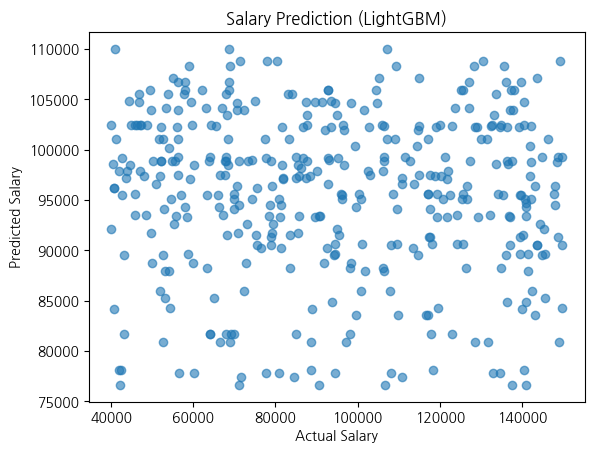

In [126]:
import matplotlib.pyplot as plt
plt.scatter(y_test, preds, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction (LightGBM)")
plt.show()

In [127]:
import sklearn, lightgbm, numpy, pandas
print(sklearn.__version__, lightgbm.__version__, numpy.__version__, pandas.__version__)


1.6.1 4.6.0 2.0.2 2.2.2


In [128]:
import inspect
print(metrics.mean_squared_error.__module__)
print(inspect.getfile(metrics.mean_squared_error))


sklearn.metrics._regression
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py


In [129]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv("/content/ai_job_market_preprocessed.csv")

# 3. ÏûÖÎ†•(X)Í≥º ÌÉÄÍπÉ(y)
target_col = "salary_range_usd"
X = df.drop(columns=[target_col])
y = df[target_col]

# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Î™®Îç∏ Ï†ïÏùò
model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.85,
    random_state=42
)

# 6. Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

# 7. ÏòàÏ∏°
y_pred = model.predict(X_test)

# 8. ÌèâÍ∞Ä ÏßÄÌëú
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R¬≤ Score: {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 44
[LightGBM] [Info] Start training from score 95654.005625
RMSE: 36,934.33
R¬≤ Score: -0.2877


In [130]:
skill_cols = [c for c in df.columns if c.startswith("skill_")]
print("Skill Ïª¨Îüº Í∞úÏàò:", len(skill_cols))
print(skill_cols[:10])
print(df[skill_cols].dtypes.value_counts())

Skill Ïª¨Îüº Í∞úÏàò: 0
[]
Series([], Name: count, dtype: int64)


/tmp/ipython-input-3955815224.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


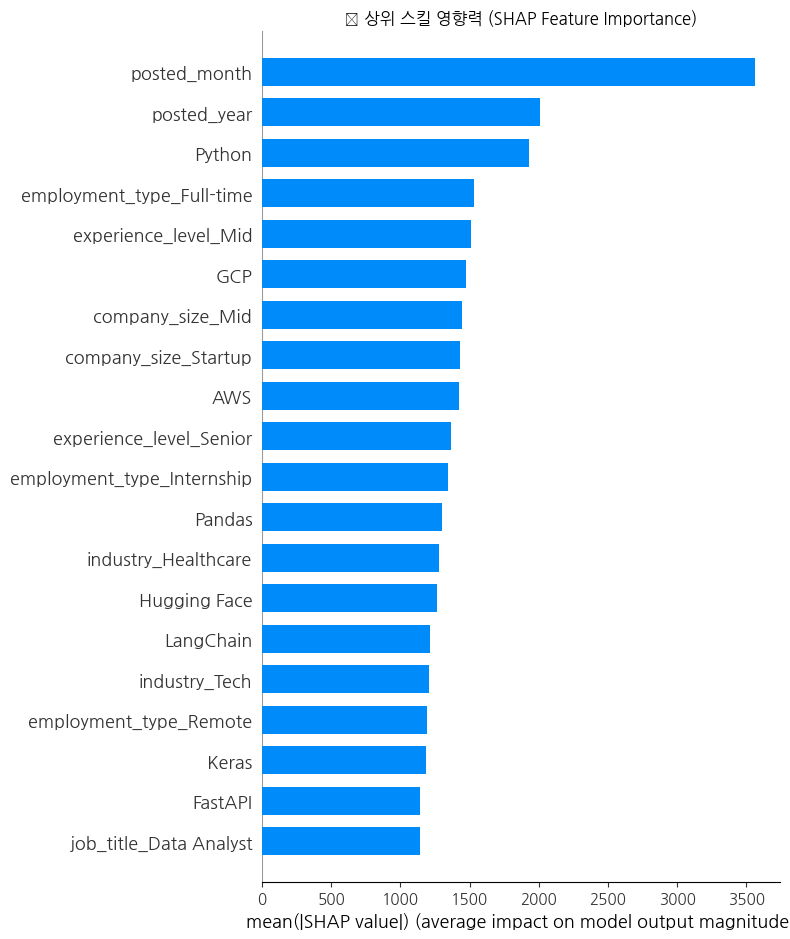

/tmp/ipython-input-3955815224.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


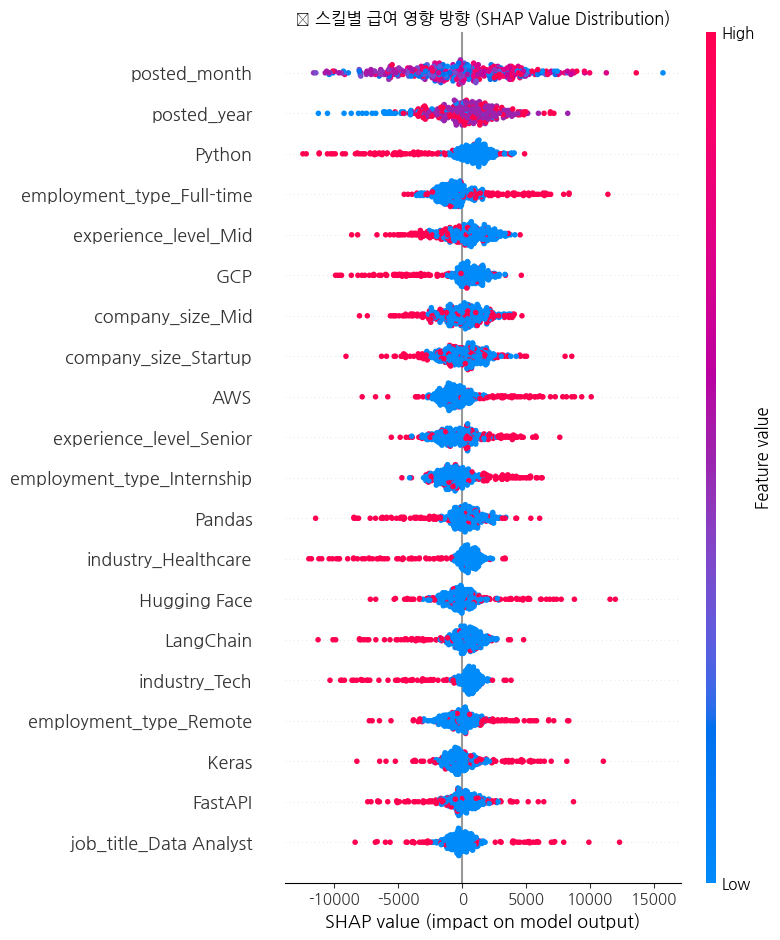

üìä ÏÉÅÏúÑ 10Í∞ú ÏòÅÌñ•Î†• Ïä§ÌÇ¨(ÎòêÎäî Ïä§ÌÇ¨ Ï°∞Ìï©):
                      Feature  Mean |SHAP|
43               posted_month  3565.047459
42                posted_year  2008.507184
36                     Python  1931.169877
2   employment_type_Full-time  1534.176762
0        experience_level_Mid  1510.375127
27                        GCP  1473.103054
5            company_size_Mid  1445.001693
6        company_size_Startup  1428.598051
20                        AWS  1421.643177
1     experience_level_Senior  1364.632464


In [131]:
# ======================================
#  SHAP Í∏∞Î∞ò Ïä§ÌÇ¨ ÏòÅÌñ•Î†• ÏãúÍ∞ÅÌôî (LightGBM)
# ======================================

!pip install shap

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. TreeExplainer Ï¥àÍ∏∞Ìôî (LightGBM Ï†ÑÏö©)
explainer = shap.TreeExplainer(model)

# 2. SHAP Í∞í Í≥ÑÏÇ∞ (Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Í∏∞Ï§Ä)
shap_values = explainer.shap_values(X_test)

# 3. Ï†ÑÏ≤¥ Ï§ëÏöîÎèÑ ÏöîÏïΩ Í∑∏ÎûòÌîÑ
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("üìà ÏÉÅÏúÑ Ïä§ÌÇ¨ ÏòÅÌñ•Î†• (SHAP Feature Importance)")
plt.tight_layout()
plt.show()

# 4. ÏÑ∏Î∂Ä Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ (Í∞íÏùò Î∞©Ìñ•ÍπåÏßÄ ÌëúÏãú)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("üéØ Ïä§ÌÇ¨Î≥Ñ Í∏âÏó¨ ÏòÅÌñ• Î∞©Ìñ• (SHAP Value Distribution)")
plt.tight_layout()
plt.show()

# 5. ÏÉÅÏúÑ 10Í∞ú Ï§ëÏöî Ïä§ÌÇ¨ Ï°∞Ìï©(ÎòêÎäî ÌîºÏ≤ò) Ï∂îÏ∂ú
mean_abs_shap = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean |SHAP|': mean_abs_shap
}).sort_values('Mean |SHAP|', ascending=False).head(10)

print("üìä ÏÉÅÏúÑ 10Í∞ú ÏòÅÌñ•Î†• Ïä§ÌÇ¨(ÎòêÎäî Ïä§ÌÇ¨ Ï°∞Ìï©):")
print(importance_df)


In [132]:
print(df.info())
min, max = 90000, 90000
for a in df['salary_range_usd']:
    if a > max:
        max = a
    if a <min:
        min= a

print(min, max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   salary_range_usd                    2000 non-null   int64
 1   experience_level_Mid                2000 non-null   int64
 2   experience_level_Senior             2000 non-null   int64
 3   employment_type_Full-time           2000 non-null   int64
 4   employment_type_Internship          2000 non-null   int64
 5   employment_type_Remote              2000 non-null   int64
 6   company_size_Mid                    2000 non-null   int64
 7   company_size_Startup                2000 non-null   int64
 8   industry_E-commerce                 2000 non-null   int64
 9   industry_Education                  2000 non-null   int64
 10  industry_Finance                    2000 non-null   int64
 11  industry_Healthcare                 2000 non-null   int64
 12  indust

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïä§ÌÇ¨ ÏÑ†Ï†ï (ÏÉÅÏúÑ SHAP Í∏∞Î∞ò ÏòàÏãú)
top_skills = ["Python", "SQL", "AWS"]  # SHAPÏóêÏÑú ÎÜíÏùÄ ÏòÅÌñ•ÏúºÎ°ú ÎÇòÏò® Ïä§ÌÇ¨

# Í∞Å Ïä§ÌÇ¨Î≥Ñ Ïó¨Î∂Ä ÌôïÏù∏
for skill in top_skills:
    if skill not in df.columns:
        print(f"‚ö†Ô∏è {skill} Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
    else:
        print(f"‚úÖ {skill} Ïª¨Îüº ÏÇ¨Ïö© Í∞ÄÎä•")

# Ï°∞Ìï© Ïä§ÌÇ¨ Ï†ïÏùò (Ïòà: Python & SQL)
df["combo_Python_SQL"] = ((df["Python"] == 1) & (df["SQL"] == 1)).astype(int)
df["combo_Python_AWS"] = ((df["Python"] == 1) & (df["AWS"] == 1)).astype(int)
df["combo_SQL_AWS"] = ((df["SQL"] == 1) & (df["AWS"] == 1)).astype(int)

# Í∏âÏó¨ Î°úÍ∑∏Í∞í or ÏõêÍ∏âÏó¨ ÏÇ¨Ïö©
target_col = "salary_range_usd" if "salary_range_usd" in df.columns else "salary_log"

# 1. Îã®Ïùº Ïä§ÌÇ¨Î≥Ñ Í∏âÏó¨ ÎπÑÍµê
plt.figure(figsize=(10,5))
sns.boxplot(data=df.melt(id_vars=target_col, value_vars=top_skills),
            x="variable", y=target_col, hue="value", palette="Set2")
plt.title("üí∞ Í∞úÎ≥Ñ Ïä§ÌÇ¨ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í∏âÏó¨ Î∂ÑÌè¨")
plt.ylabel("Salary (log-scale or USD)")
plt.xlabel("Skill")
plt.legend(title="Î≥¥Ïú† Ïó¨Î∂Ä", labels=["ÏóÜÏùå", "ÏûàÏùå"])
plt.tight_layout()
plt.show()

# 2. Ï°∞Ìï© Ïä§ÌÇ¨Î≥Ñ Í∏âÏó¨ ÎπÑÍµê
combos = ["combo_Python_SQL", "combo_Python_AWS", "combo_SQL_AWS"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df.melt(id_vars=target_col, value_vars=combos),
            x="variable", y=target_col, hue="value", palette="Set3")
plt.title("‚öôÔ∏è Ï£ºÏöî Ïä§ÌÇ¨ Ï°∞Ìï©Î≥Ñ Í∏âÏó¨ Î∂ÑÌè¨ ÎπÑÍµê")
plt.ylabel("Salary (log-scale or USD)")
plt.xlabel("Skill Combination")
plt.legend(title="Ï°∞Ìï© Î≥¥Ïú† Ïó¨Î∂Ä", labels=["ÏóÜÏùå", "ÏûàÏùå"])
plt.tight_layout()
plt.show()

# 3. Ï°∞Ìï©Î≥Ñ ÌèâÍ∑† Í∏âÏó¨ ÎπÑÍµê
mean_salary = (
    df.groupby(combos)[target_col]
      .mean()
      .reset_index()
      .sort_values(by=target_col, ascending=False)
)
print("üìä Ïä§ÌÇ¨ Ï°∞Ìï©Î≥Ñ ÌèâÍ∑† Í∏âÏó¨:")
print(mean_salary)


ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: 8
ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: ['job_title_AI Researcher', 'job_title_Computer Vision Engineer', 'job_title_Data Analyst', 'job_title_Data Scientist', 'job_title_ML Engineer', 'job_title_NLP Engineer', 'job_title_Quant Researcher', 'posted_month']
ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: 2
ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: ['experience_level_Mid', 'experience_level_Senior']
ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: 3
ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: ['employment_type_Full-time', 'employment_type_Internship', 'employment_type_Remote']
ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: 2
ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: ['company_size_Mid', 'company_size_Startup']
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 1600, nu

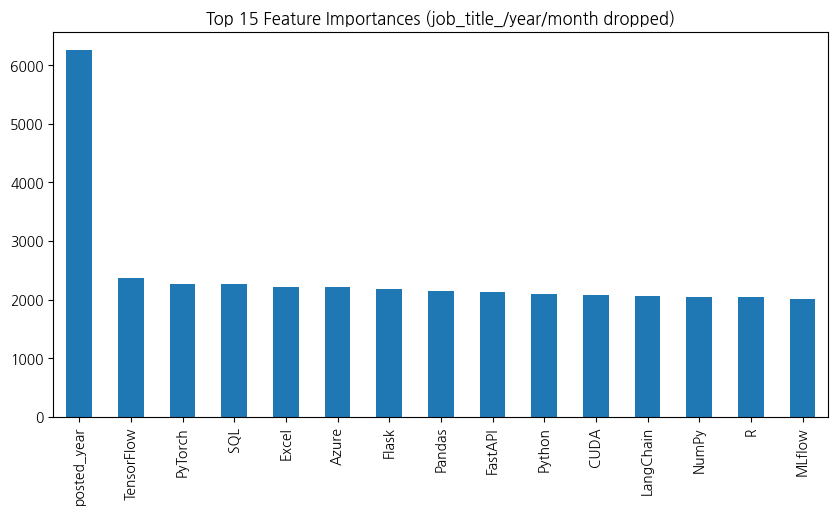


Ïã§Ï†ú Í∏âÏó¨ vs ÏòàÏ∏° Í∏âÏó¨ (ÏÉÅÏúÑ 5Í∞ú):
   salary_range_usd    pred_salary
0             92860   86990.642274
1             78523   83563.977070
2            124496  123424.086523
3             50908   57001.980512
4             98694   94796.237627


In [152]:
# -----------------------------
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
# -----------------------------
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# -----------------------------
df = pd.read_csv("/content/ai_job_market_preprocessed.csv")

# -----------------------------
# 3. job_title_, posted_year, posted_month Ïª¨Îüº ÏûêÎèô ÏÇ≠Ï†ú
# -----------------------------
# 1) job_title_Î°ú ÏãúÏûëÌïòÎäî Î™®Îì† Ïª¨Îüº Ï∞æÍ∏∞
drop_cols = [c for c in df.columns if c.startswith("job_title_")]
drop_cols1 = [c for c in df.columns if c.startswith("experience_level_")]
drop_cols2 = [c for c in df.columns if c.startswith("employment_type_")]
drop_cols3 = [c for c in df.columns if c.startswith("company_size_")]
# 2) posted_year, posted_month Î™ÖÏãúÏ†Å Ï∂îÍ∞Ä
for col in ["posted_month"]:
    if col in df.columns:
        drop_cols.append(col)

# 3) Ïã§Ï†ú ÏÇ≠Ï†ú
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: {len(drop_cols)}")
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: {drop_cols[:8]}")  # ÏùºÎ∂Ä ÏòàÏãú Ï∂úÎ†•

df = df.drop(columns=drop_cols, errors='ignore')

# 3) Ïã§Ï†ú ÏÇ≠Ï†ú
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: {len(drop_cols1)}")
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: {drop_cols1[:8]}")  # ÏùºÎ∂Ä ÏòàÏãú Ï∂úÎ†•

df = df.drop(columns=drop_cols1, errors='ignore')

# 3) Ïã§Ï†ú ÏÇ≠Ï†ú
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: {len(drop_cols2)}")
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: {drop_cols2[:8]}")  # ÏùºÎ∂Ä ÏòàÏãú Ï∂úÎ†•

df = df.drop(columns=drop_cols2, errors='ignore')

# 3) Ïã§Ï†ú ÏÇ≠Ï†ú
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº Ïàò: {len(drop_cols3)}")
print(f"ÏÇ≠Ï†úÎêú Ïª¨Îüº ÏòàÏãú: {drop_cols3[:8]}")  # ÏùºÎ∂Ä ÏòàÏãú Ï∂úÎ†•

df = df.drop(columns=drop_cols3, errors='ignore')

# -----------------------------
# 4. ÏûÖÎ†•(X), ÌÉÄÍπÉ(y) Î∂ÑÎ¶¨
# -----------------------------
target_col = "salary_range_usd"
X = df.drop(columns=[target_col])
y = df[target_col]

# -----------------------------
# 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 6. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# -----------------------------
model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.85,
    random_state=42
)
model.fit(X_train, y_train)

# -----------------------------
# 7. ÌèâÍ∞Ä
# -----------------------------
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nÎ™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(f"RMSE: {rmse:,.2f}")
print(f"R¬≤ Score: {r2:.4f}")

# -----------------------------
# 8. Ï£ºÏöî Ïä§ÌÇ¨ Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
# -----------------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
importances.head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances (job_title_/year/month dropped)")
plt.show()

# -----------------------------
# 9. ÏòàÏ∏°Í∞í Ï∂îÍ∞Ä Î∞è ÎØ∏Î¶¨Î≥¥Í∏∞
# -----------------------------
df["pred_salary"] = model.predict(X)
print("\nÏã§Ï†ú Í∏âÏó¨ vs ÏòàÏ∏° Í∏âÏó¨ (ÏÉÅÏúÑ 5Í∞ú):")
print(df[[target_col, "pred_salary"]].head())


In [1]:
from graphviz import Digraph

# ERD Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
erd = Digraph('AI_JobMarket_ERD', filename='ai_job_market_erd', format='png')
erd.attr(rankdir='LR', size='8,5')  # Í∞ÄÎ°úÌòï Î∞∞Ïπò

# ÏóîÌã∞Ìã∞ ÎÖ∏Îìú Ï†ïÏùò
erd.attr('node', shape='box', style='filled', fillcolor='#EFF3FF', color='#5A78C6', fontname='NanumGothic')
erd.node('JobPosting', 'JobPosting\n- salary_range_usd\n- posted_year\n- posted_month')

erd.node('ExperienceLevel', 'ExperienceLevel\n- Mid\n- Senior')
erd.node('EmploymentType', 'EmploymentType\n- Full-time\n- Remote\n- Internship')
erd.node('Industry', 'Industry\n- Tech\n- Education\n- Finance...')
erd.node('JobTitle', 'JobTitle\n- ML Engineer\n- Data Scientist\n- Data Analyst...')
erd.node('Skill', 'Skill\n- Python\n- SQL\n- TensorFlow\n- PyTorch...')

# Í¥ÄÍ≥Ñ Ïó∞Í≤∞ÏÑ†
erd.attr('edge', color='#4A5568', arrowsize='0.7')
erd.edge('JobPosting', 'ExperienceLevel', label='1:N')
erd.edge('JobPosting', 'EmploymentType', label='1:N')
erd.edge('JobPosting', 'Industry', label='1:N')
erd.edge('JobPosting', 'JobTitle', label='1:N')
erd.edge('JobPosting', 'Skill', label='N:N')

# ÌååÏùº Ï†ÄÏû• Î∞è Î†åÎçîÎßÅ
erd.render()
print("‚úÖ ERD Îã§Ïù¥Ïñ¥Í∑∏Îû®Ïù¥ 'ai_job_market_erd.png'Î°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")


‚úÖ ERD Îã§Ïù¥Ïñ¥Í∑∏Îû®Ïù¥ 'ai_job_market_erd.png'Î°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
